In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                               random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

In [35]:
# import torch
# import torchvision
# import argparse
# import pickle
# from argparse import Namespace

# from PIL import Image as PIL_Image
# from ExpansionNet.models.End_ExpansionNet_v2 import End_ExpansionNet_v2
# from ExpansionNet.utils.language_utils import convert_vector_idx2word
# # CPU = torch.device('cpu')
# def generate_beam(model, tokenizer, beam_size: int = 5, prompt=None, embed=None, entry_length=67, temperature=1., stop_token: str = '.'):
# #     image_paths=['./nodeserver/pythonscripts/test/1176519574_b4d569ecbe_z.jpg','nodeserver/pythonscripts/test/2633528304_369cf89ce1_z.jpg']
#     drop_args = Namespace(enc=0.0,
#                           dec=0.0,
#                           enc_input=0.0,
#                           dec_input=0.0,
#                           other=0.0)
#     model_dim=512
#     N_enc=3
#     N_dec=3
#     max_seq_len=74
#     beam_size=5
#     load_path='./ExpansionNet/rf_model.pth'
#     model_args = Namespace(model_dim=model_dim,
#                            N_enc=N_enc,
#                            N_dec=N_dec,
#                            dropout=0.0,
#                            drop_args=drop_args)

#     with open('./ExpansionNet/demo_coco_tokens.pickle', 'rb') as f:
#         coco_tokens = pickle.load(f)
#     print("Dictionary loaded ...")

#     img_size = 384
#     model = End_ExpansionNet_v2(swin_img_size=img_size, swin_patch_size=4, swin_in_chans=3,
#                                 swin_embed_dim=192, swin_depths=[2, 2, 18, 2], swin_num_heads=[6, 12, 24, 48],
#                                 swin_window_size=12, swin_mlp_ratio=4., swin_qkv_bias=True, swin_qk_scale=None,
#                                 swin_drop_rate=0.0, swin_attn_drop_rate=0.0, swin_drop_path_rate=0.0,
#                                 swin_norm_layer=torch.nn.LayerNorm, swin_ape=False, swin_patch_norm=True,
#                                 swin_use_checkpoint=False,
#                                 final_swin_dim=1536,

#                                 d_model=model_args.model_dim, N_enc=model_args.N_enc,
#                                 N_dec=model_args.N_dec, num_heads=8, ff=2048,
#                                 num_exp_enc_list=[32, 64, 128, 256, 512],
#                                 num_exp_dec=16,
#                                 output_word2idx=coco_tokens['word2idx_dict'],
#                                 output_idx2word=coco_tokens['idx2word_list'],
#                                 max_seq_len=max_seq_len, drop_args=model_args.drop_args,
#                                 rank=0)
#     model.to(0)#
#     map_location = {'cuda:%d' % 0: 'cuda:%d' % 0}#
    
#     checkpoint = torch.load(load_path)
#     model.load_state_dict(checkpoint['model_state_dict'])
#     print("Model loaded ...")

#     transf_1 = torchvision.transforms.Compose([torchvision.transforms.Resize((img_size, img_size))])
#     transf_2 = torchvision.transforms.Compose([torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                                                                 std=[0.229, 0.224, 0.225])])

#     input_images = []
#     for path in image_paths:
#         pil_image = PIL_Image.open(path)
#         if pil_image.mode != 'RGB':
#            pil_image = PIL_Image.new("RGB", pil_image.size)
#         preprocess_pil_image = transf_1(pil_image)
#         tens_image_1 = torchvision.transforms.ToTensor()(preprocess_pil_image)
#         tens_image_2 = transf_2(tens_image_1)
#         input_images.append(tens_image_2)

#     print("Generating captions ...\n")
#     import time

#     start = time.time()
#     for i in range(len(input_images)):
#         path = image_paths[i]
#         image = input_images[i].unsqueeze(0).to(0)
#         beam_search_kwargs = {'beam_size': beam_size,
#                               'beam_max_seq_len': max_seq_len,
#                               'sample_or_max': 'max',
#                               'how_many_outputs': 1,
#                               'sos_idx': coco_tokens['word2idx_dict'][coco_tokens['sos_str']],
#                               'eos_idx': coco_tokens['word2idx_dict'][coco_tokens['eos_str']]}
#         with torch.no_grad():
#             pred, _ = model(enc_x=image,
#                             enc_x_num_pads=[0],
#                             mode='beam_search', **beam_search_kwargs)
#         pred = convert_vector_idx2word(pred[0][0], coco_tokens['idx2word_list'])[1:-1]
#         pred[-1] = pred[-1] + '.'
#         pred = ' '.join(pred).capitalize()
#         print(path + ') \n\tDescription: ' + pred + '\n')
#     end = time.time()
#     print(end-start)

#     print("Closed.")


In [16]:
import clip
import os
from torch import nn
import numpy as np
import torch
import torch.nn.functional as nnf
import sys
import argparse
from typing import Tuple, List, Union, Optional
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm, trange
import skimage.io as io
import PIL.Image
from IPython.display import Image 
N = type(None)
V = np.array
ARRAY = np.ndarray
ARRAYS = Union[Tuple[ARRAY, ...], List[ARRAY]]
VS = Union[Tuple[V, ...], List[V]]
VN = Union[V, N]
VNS = Union[VS, N]
T = torch.Tensor
TS = Union[Tuple[T, ...], List[T]]
TN = Optional[T]
TNS = Union[Tuple[TN, ...], List[TN]]
TSN = Optional[TS]
TA = Union[T, ARRAY]


D = torch.device
CPU = torch.device('cpu')

class MLP(nn.Module):

    def forward(self, x: T) -> T:
        return self.model(x)

    def __init__(self, sizes: Tuple[int, ...], bias=True, act=nn.Tanh):
        super(MLP, self).__init__()
        layers = []
        for i in range(len(sizes) -1):
            layers.append(nn.Linear(sizes[i], sizes[i + 1], bias=bias))
            if i < len(sizes) - 2:
                layers.append(act())
        self.model = nn.Sequential(*layers)


class ClipCaptionModel(nn.Module):

    #@functools.lru_cache #FIXME
    def get_dummy_token(self, batch_size: int, device: D) -> T:
        return torch.zeros(batch_size, self.prefix_length, dtype=torch.int64, device=device)

    def forward(self, tokens: T, prefix: T, mask: Optional[T] = None, labels: Optional[T] = None):
        embedding_text = self.gpt.transformer.wte(tokens)
        prefix_projections = self.clip_project(prefix).view(-1, self.prefix_length, self.gpt_embedding_size)
        #print(embedding_text.size()) #torch.Size([5, 67, 768])
        #print(prefix_projections.size()) #torch.Size([5, 1, 768])
        embedding_cat = torch.cat((prefix_projections, embedding_text), dim=1)
        if labels is not None:
            dummy_token = self.get_dummy_token(tokens.shape[0], tokens.device)
            labels = torch.cat((dummy_token, tokens), dim=1)
        out = self.gpt(inputs_embeds=embedding_cat, labels=labels, attention_mask=mask)
        return out

    def __init__(self, prefix_length: int, prefix_size: int = 512):
        super(ClipCaptionModel, self).__init__()
        self.prefix_length = prefix_length
        self.gpt = GPT2LMHeadModel.from_pretrained('gpt2')
        self.gpt_embedding_size = self.gpt.transformer.wte.weight.shape[1]
        if prefix_length > 10:  # not enough memory
            self.clip_project = nn.Linear(prefix_size, self.gpt_embedding_size * prefix_length)
        else:
            self.clip_project = MLP((prefix_size, (self.gpt_embedding_size * prefix_length) // 2, self.gpt_embedding_size * prefix_length))


class ClipCaptionPrefix(ClipCaptionModel):

    def parameters(self, recurse: bool = True):
        return self.clip_project.parameters()

    def train(self, mode: bool = True):
        super(ClipCaptionPrefix, self).train(mode)
        self.gpt.eval()
        return self


#@title Caption prediction

def generate_beam(model, tokenizer, beam_size: int = 5, prompt=None, embed=None,
                  entry_length=67, temperature=1., stop_token: str = '.'):

    model.eval()
    stop_token_index = tokenizer.encode(stop_token)[0]
    tokens = None
    scores = None
    device = next(model.parameters()).device
    seq_lengths = torch.ones(beam_size, device=device)
    is_stopped = torch.zeros(beam_size, device=device, dtype=torch.bool)
    with torch.no_grad():
        if embed is not None:
            generated = embed
        else:
            if tokens is None:
                tokens = torch.tensor(tokenizer.encode(prompt))
                tokens = tokens.unsqueeze(0).to(device)
                generated = model.gpt.transformer.wte(tokens)
        for i in range(entry_length):
            outputs = model.gpt(inputs_embeds=generated)
            logits = outputs.logits
            logits = logits[:, -1, :] / (temperature if temperature > 0 else 1.0)
            logits = logits.softmax(-1).log()
            if scores is None:
                scores, next_tokens = logits.topk(beam_size, -1)
                generated = generated.expand(beam_size, *generated.shape[1:])
                next_tokens, scores = next_tokens.permute(1, 0), scores.squeeze(0)
                if tokens is None:
                    tokens = next_tokens
                else:
                    tokens = tokens.expand(beam_size, *tokens.shape[1:])
                    tokens = torch.cat((tokens, next_tokens), dim=1)
            else:
                logits[is_stopped] = -float(np.inf)
                logits[is_stopped, 0] = 0
                scores_sum = scores[:, None] + logits
                seq_lengths[~is_stopped] += 1
                scores_sum_average = scores_sum / seq_lengths[:, None]
                scores_sum_average, next_tokens = scores_sum_average.view(-1).topk(beam_size, -1)
                next_tokens_source = next_tokens // scores_sum.shape[1]
                seq_lengths = seq_lengths[next_tokens_source]
                next_tokens = next_tokens % scores_sum.shape[1]
                next_tokens = next_tokens.unsqueeze(1)
                tokens = tokens[next_tokens_source]
                tokens = torch.cat((tokens, next_tokens), dim=1)
                generated = generated[next_tokens_source]
                scores = scores_sum_average * seq_lengths
                is_stopped = is_stopped[next_tokens_source]
            next_token_embed = model.gpt.transformer.wte(next_tokens.squeeze()).view(generated.shape[0], 1, -1)
            generated = torch.cat((generated, next_token_embed), dim=1)
            is_stopped = is_stopped + next_tokens.eq(stop_token_index).squeeze()
            if is_stopped.all():
                break
    scores = scores / seq_lengths
    output_list = tokens.cpu().numpy()
    output_texts = [tokenizer.decode(output[:int(length)]) for output, length in zip(output_list, seq_lengths)]
    order = scores.argsort(descending=True)
    output_texts = [output_texts[i] for i in order]
    return output_texts


def generate2(
        model,
        tokenizer,
        tokens=None,
        prompt=None,
        embed=None,
        entry_count=1,
        entry_length=67,
        top_p=0.8,
        temperature=1.,
        stop_token: str = '.',
):
    model.eval()
    generated_num = 0
    generated_list = []
    stop_token_index = tokenizer.encode(stop_token)[0]
    filter_value = -float("Inf")
    device = next(model.parameters()).device

    with torch.no_grad():

        for entry_idx in trange(entry_count):
            if embed is not None:
                generated = embed
            else:
                if tokens is None:
                    tokens = torch.tensor(tokenizer.encode(prompt))
                    tokens = tokens.unsqueeze(0).to(device)

                generated = model.gpt.transformer.wte(tokens)

            for i in range(entry_length):

                outputs = model.gpt(inputs_embeds=generated)
                logits = outputs.logits
                logits = logits[:, -1, :] / (temperature if temperature > 0 else 1.0)
                sorted_logits, sorted_indices = torch.sort(logits, descending=True)
                cumulative_probs = torch.cumsum(nnf.softmax(sorted_logits, dim=-1), dim=-1)
                sorted_indices_to_remove = cumulative_probs > top_p
                sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[
                                                    ..., :-1
                                                    ].clone()
                sorted_indices_to_remove[..., 0] = 0

                indices_to_remove = sorted_indices[sorted_indices_to_remove]
                logits[:, indices_to_remove] = filter_value
                next_token = torch.argmax(logits, -1).unsqueeze(0)
                next_token_embed = model.gpt.transformer.wte(next_token)
                if tokens is None:
                    tokens = next_token
                else:
                    tokens = torch.cat((tokens, next_token), dim=1)
                generated = torch.cat((generated, next_token_embed), dim=1)
                if stop_token_index == next_token.item():
                    break

            output_list = list(tokens.squeeze().cpu().numpy())
            output_text = tokenizer.decode(output_list)
            generated_list.append(output_text)

    return generated_list[0]


def img_caption(filepath,beam_size):
    print(filepath, file=sys.stderr)
    def get_device(device_id: int) -> D:
        if not torch.cuda.is_available():
            return CPU
        device_id = min(torch.cuda.device_count() - 1, device_id)
        return torch.device(f'cuda:{device_id}')

    is_gpu = True
    CUDA = get_device
 #     model_path = os.path.join(os.getcwd(),"nodeserver","pythonscripts","imagecaption","model", 'model_weights.pt')
    model_path ="./imagecaption/model/model_weights.pt"
    device = CUDA(0) if is_gpu else "cpu"
    clip_model, preprocess = clip.load("ViT-B/32", device=device, jit=False)
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

    prefix_length = 10

    model = ClipCaptionModel(prefix_length)

    model.load_state_dict(torch.load(model_path, map_location=CPU)) 

    model = model.eval() 
    device = CUDA(0) if is_gpu else "cpu"
    model = model.to(device)

    use_beam_search = True  
    image = io.imread(filepath)
    pil_image = PIL.Image.fromarray(image)

    # display(pil_image)
    import time
    start=time.time()
    image = preprocess(pil_image).unsqueeze(0).to(device)
    with torch.no_grad():
        prefix = clip_model.encode_image(image).to(device, dtype=torch.float32)
        prefix_embed = model.clip_project(prefix).reshape(1, prefix_length, -1)
    if use_beam_search:
        generated_text_prefix = generate_beam(model, tokenizer, embed=prefix_embed,beam_size = beam_size)[0]
    else:
        generated_text_prefix = generate2(model, tokenizer, embed=prefix_embed)

    end=time.time()

    


#     print('\n')
    print("Time Taken",str(end-start), file=sys.stderr)

    print(generated_text_prefix, file=sys.stderr)
    return end-start,str(generated_text_prefix)

In [26]:
ACTUALS=["two elephants walking in a grassy flat area",
            "a tennis player getting ready to hit a ball",
            "a group of large boats is parts at a city marina",
            "a man standing next to a man in a bathroom",
            "a herd of cattle are standing and grazing in a field",
            "men standing in a street next to a car and a large bus",
            "a train moves past a cement station platform",
            "a long railroad train carrying several cars behind it",
            "a man on a motor bike on a street",
            "a jumbo jet airplane coming in for a landing on a runway"]

image_paths=['5155093236_01067e4f6e_z.jpg','2633528304_369cf89ce1_z.jpg','9874637964_ce338575f0_z.jpg','1176519574_b4d569ecbe_z.jpg','5093961450_d8c840d0d2_z.jpg','9372536208_b97bc7eeff_z.jpg','9419081044_7cebf902ec_z.jpg','9743494618_f0faea1cdc_z.jpg','8700354838_884967117d_z.jpg','9362545580_34d972390d_z.jpg']



beam_sizes = [i for i in range(1,15)]
beam_time = {}
beam_score_rouge1_p = {}
beam_score_rouge1_r = {}
beam_score_rougeL_p = {}
beam_score_rougeL_r = {}

for i in beam_sizes:
    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    AVG_ROUGE_1_precision=0
    AVG_ROUGE_1_recall=0
    AVG_ROUGE_L_precision=0
    AVG_ROUGE_L_recall=0
    ind = 0
#     strings = []
    time_taken = []
    for image in image_paths:
        tt,st = img_caption("./test/"+image,i)
#         strings.append(st)
        time_taken.append(tt)
        scores=scorer.score(ACTUALS[ind], st)
        
        AVG_ROUGE_1_precision+=scores['rouge1'].precision
        AVG_ROUGE_L_precision+=scores['rougeL'].precision
        AVG_ROUGE_1_recall+=scores['rouge1'].recall
        AVG_ROUGE_L_recall+=scores['rougeL'].recall
        
        ind = ind + 1
        
    beam_time[i] = sum(time_taken) / len(time_taken)
    beam_score_rouge1_p[i] = AVG_ROUGE_1_precision/10
    beam_score_rouge1_r[i] = AVG_ROUGE_1_recall/10
    beam_score_rougeL_p[i] = AVG_ROUGE_L_precision/10
    beam_score_rougeL_r[i] = AVG_ROUGE_L_recall/10

./test/5155093236_01067e4f6e_z.jpg
Time Taken 0.36925172805786133
elephants walking in the bush.
./test/2633528304_369cf89ce1_z.jpg
Time Taken 0.5059001445770264
tennis player celebrates after winning his match against tennis player during day.
./test/9874637964_ce338575f0_z.jpg
Time Taken 0.2357950210571289
a city is a port.
./test/1176519574_b4d569ecbe_z.jpg
Time Taken 0.485889196395874
person, left, and person, right, look at a mirror.
./test/5093961450_d8c840d0d2_z.jpg
Time Taken 0.29430699348449707
cattle graze in a pasture.
./test/9372536208_b97bc7eeff_z.jpg
Time Taken 0.28139495849609375
a bus is loaded with passengers.
./test/9419081044_7cebf902ec_z.jpg
Time Taken 0.2283341884613037
the train arrives at station.
./test/9743494618_f0faea1cdc_z.jpg
Time Taken 0.31842613220214844
a train passes through australian suburb.
./test/8700354838_884967117d_z.jpg
Time Taken 0.28358006477355957
a police officer on a scooter.
./test/9362545580_34d972390d_z.jpg
Time Taken 0.28292417526245117

Time Taken 1.4412500858306885
a train passes through australian local government area.
./test/8700354838_884967117d_z.jpg
Time Taken 0.8350081443786621
a police officer on a scooter.
./test/9362545580_34d972390d_z.jpg
Time Taken 0.6843559741973877
aircraft model on the runway.
./test/5155093236_01067e4f6e_z.jpg
Time Taken 0.9257407188415527
elephants in the wild - photo #.
./test/2633528304_369cf89ce1_z.jpg
Time Taken 1.3441076278686523
tennis player in action during his first round match against tennis player.
./test/9874637964_ce338575f0_z.jpg
Time Taken 0.718519926071167
aerial view of the port.
./test/1176519574_b4d569ecbe_z.jpg
Time Taken 2.3882830142974854
person, left, and person look at each other in the locker room.
./test/5093961450_d8c840d0d2_z.jpg
Time Taken 0.7126431465148926
cattle graze in a pasture.
./test/9372536208_b97bc7eeff_z.jpg
Time Taken 1.2024767398834229
passengers boarding a bus at a bus station.
./test/9419081044_7cebf902ec_z.jpg
Time Taken 0.5763750076293945

In [27]:
beam_time

{1: 0.32858026027679443,
 2: 0.4674741506576538,
 3: 0.48569068908691404,
 4: 0.5796504735946655,
 5: 0.7023421049118042,
 6: 0.8307416915893555,
 7: 1.030248498916626,
 8: 1.0183224201202392,
 9: 1.0985748291015625,
 10: 1.265007448196411,
 11: 1.3867156982421875,
 12: 1.5191189765930175,
 13: 1.5014585256576538,
 14: 1.6311741113662719}

In [2]:
beam_score_rouge1_p

{1: 0.4377777777777777,
 2: 0.36477272727272725,
 3: 0.35178571428571426,
 4: 0.3575,
 5: 0.3575,
 6: 0.3575,
 7: 0.3575,
 8: 0.3575,
 9: 0.3575,
 10: 0.3575,
 11: 0.3575,
 12: 0.35083333333333333,
 13: 0.35083333333333333,
 14: 0.35083333333333333}

In [4]:
beam_score_rouge1_r

{1: 0.25505633255633253,
 2: 0.23373348873348876,
 3: 0.22373348873348875,
 4: 0.22297591297591296,
 5: 0.22297591297591296,
 6: 0.22297591297591296,
 7: 0.22297591297591296,
 8: 0.22297591297591296,
 9: 0.22297591297591296,
 10: 0.22297591297591296,
 11: 0.22297591297591296,
 12: 0.22297591297591296,
 13: 0.22297591297591296,
 14: 0.22297591297591296}

In [6]:
beam_score_rougeL_p

{1: 0.4011111111111111,
 2: 0.36477272727272725,
 3: 0.35178571428571426,
 4: 0.3575,
 5: 0.3575,
 6: 0.3575,
 7: 0.3575,
 8: 0.3575,
 9: 0.3575,
 10: 0.3575,
 11: 0.3575,
 12: 0.35083333333333333,
 13: 0.35083333333333333,
 14: 0.35083333333333333}

In [8]:
beam_score_rougeL_r

{1: 0.23763209013209016,
 2: 0.23373348873348876,
 3: 0.22373348873348875,
 4: 0.22297591297591296,
 5: 0.22297591297591296,
 6: 0.22297591297591296,
 7: 0.22297591297591296,
 8: 0.22297591297591296,
 9: 0.22297591297591296,
 10: 0.22297591297591296,
 11: 0.22297591297591296,
 12: 0.22297591297591296,
 13: 0.22297591297591296,
 14: 0.22297591297591296}

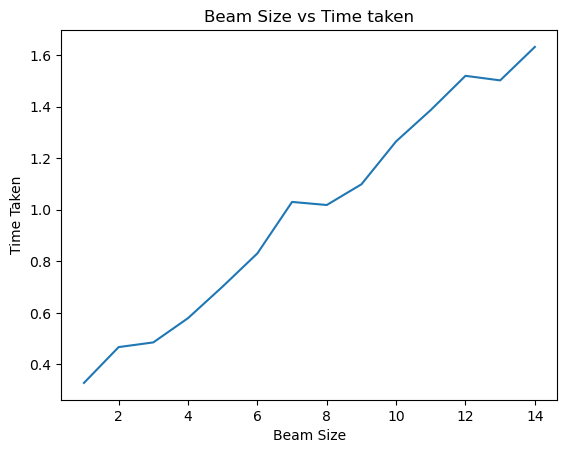

In [41]:
import matplotlib.pyplot as plt 
import numpy as np 
    
plt.plot(beam_time.keys(),beam_time.values()) 
plt.title('Beam Size vs Time taken') 
plt.xlabel("Beam Size")
plt.ylabel("Time Taken")
plt.show() 

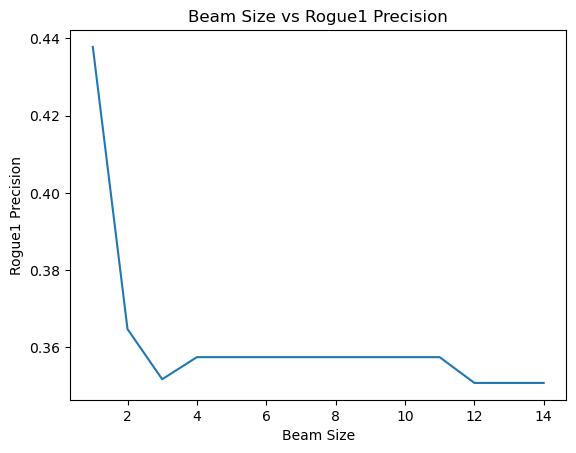

In [9]:
import matplotlib.pyplot as plt 
import numpy as np 
    
plt.plot(beam_score_rouge1_p.keys(),beam_score_rouge1_p.values()) 
plt.title('Beam Size vs Precision') 
plt.xlabel("Beam Size")
plt.ylabel("Rogue1 Precision")
plt.show() 

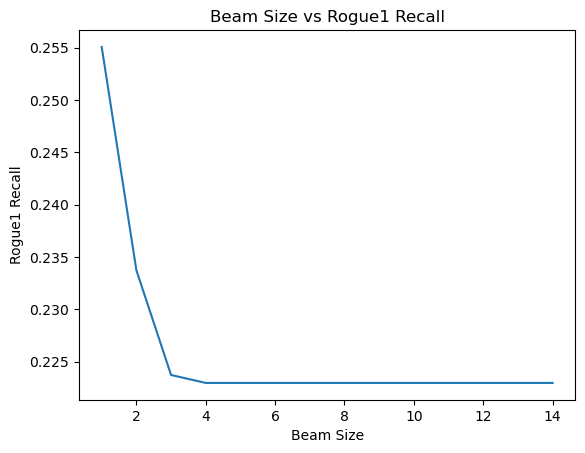

In [10]:
plt.plot(beam_score_rouge1_r.keys(),beam_score_rouge1_r.values()) 
plt.title('Beam Size vs Rogue1 Recall') 
plt.xlabel("Beam Size")
plt.ylabel("Rogue1 Recall")
plt.show() 

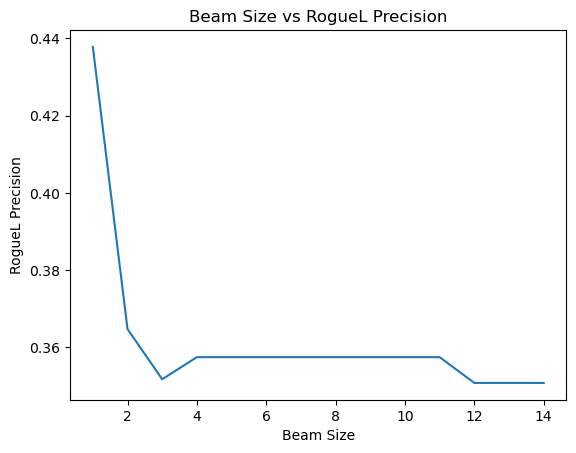

In [48]:
plt.plot(beam_score_rougeL_p.keys(),beam_score_rouge1_p.values()) 
plt.title('Beam Size vs RogueL Precision') 
plt.xlabel("Beam Size")
plt.ylabel("RogueL Precision")
plt.show() 

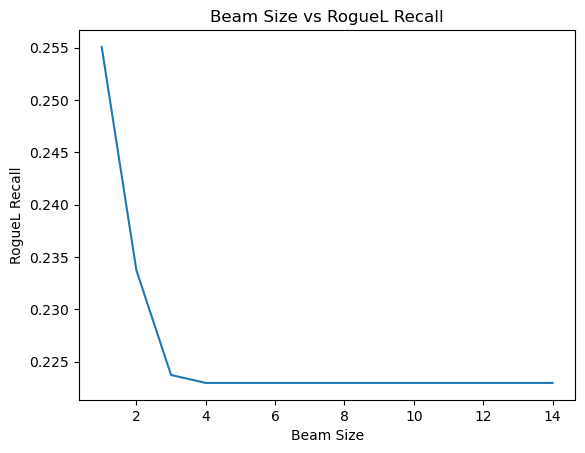

In [49]:
plt.plot(beam_score_rougeL_r.keys(),beam_score_rouge1_r.values()) 
plt.title('Beam Size vs RogueL Recall') 
plt.xlabel("Beam Size")
plt.ylabel("RogueL Recall")
plt.show() 